# 特征缩放与特征工程

> [Machine Learning | Coursera](https://www.coursera.org/specializations/machine-learning-introduction)

## 特征缩放

<b>特征缩放 (*Feature Scaling*)</b>是机器学习数据预处理中的关键技术，用于将不同量纲和数值范围的特征统一到相似的尺度上.

<!-- <details>
<summary>
    <font size='3', color='darkgreen'><b>为什么需要特征缩放?</b></font>
</summary>

<s>为了解决不同特征间量纲差异导致的算法偏向问题，提升模型收敛速度和准确性</s>.

以房价预测模型为例:

- 房屋面积：50-200平方米

- 房间数量：1-5间

如果不做特征缩放，面积这个"大数字"会显著影响算法, 房间数量这个"小数字"几乎被忽略, 导致梯度下降算法的推进效率降低 (不同参数的梯度下降速度可能会有较大差异).

在特征变量的分布图表上, 这种现象的表现就类似下图:

<figure>
    <center> <img src="../../assets/ml.assets/feat-scaling/feat-scaling.png"   ></center>
</figure>   

由于数据的数量级不在一个尺度上, 但坐标轴的缩放尺度却是相同的, 这就导致了数据分布异常集中在一片区域. -->

### 为什么需要特征缩放

<s>为了解决不同特征间量纲差异导致的算法偏向问题，提升模型收敛速度和准确性</s>.

以房价预测模型为例:

- 房屋面积：50-200平方米

- 房间数量：1-5间

如果不做特征缩放，面积这个"大数字"会显著影响算法, 房间数量这个"小数字"几乎被忽略, 导致梯度下降算法的推进效率降低 (不同参数的梯度下降速度可能会有较大差异).

在特征变量的分布图表上, 这种现象的表现就类似下图:

<figure>
    <center> <img src="../../assets/ml.assets/feat-engineering/feat-scaling.png"   ></center>
</figure>   

由于数据的数量级不在一个尺度上, 但坐标轴的缩放尺度却是相同的, 这就导致了数据分布异常集中在一片区域.


### 数据集可视化

以在[多元线性回归模型理论学习](https://wiki.virtualguard101.com/notes/ml/multi-feat/)中的数据集为例:


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from src.lab_utils_multi import  load_house_data, run_gradient_descent 
from src.lab_utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from src.lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('seaborn-v0_8')

# 切换到src目录以正确加载数据

# 加载数据集
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']


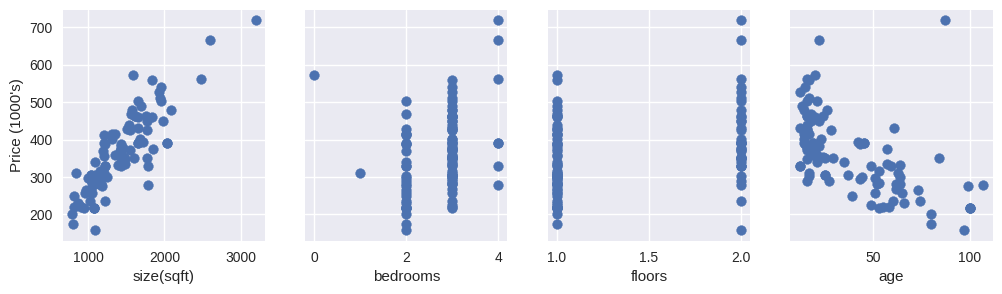

In [18]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()


### 特征缩放常用方法

#### 均值归一化

特征缩放, 本质上是将每个正特征除以其最大值, 即

$$
x_i = \frac{x_i}{max}
$$

或者更一般地，使用 

$$
x_i = \frac{x_i - \mu_i}{max - min}
$$

对每个特征进行最小值和最大值的重新缩放. 其中, $\mu_i$ 是该特征集的均值, 且会将数据缩放到区间 `[-1, 1]` 内, 故该方法称为**均值归一化 (*Mean Normalization*)**

这两种方法都将特征进行缩放, 其中第一种方法适用于正特征, 第二种方法（均值归一化）则更加通用, 将数据以均值为中心进行缩放, 具体范围取决于原始数据的分布.

#### z-score标准化

相比较均值归一化基于特征数据的**极差**进行缩放, z-score标准化则基于特征数据的**标准差**对特征样本值进行缩放.

经过z-score标准化后, 所有特征的均值将变为 $0$, 标准差将变为 $1$.

z-score标准化的数学表达式如下:

$$
x_{j}^{(i)} = \frac{x_{j}^{(i)} - \mu_{j}}{\sigma_{j}}
$$

其中, $\mu_{j}$ 表示特征 $j$ 所有样本值的均值, $\sigma_{j}$ 表示特征 $j$ 的标准差:

$$
\mu_{j} = \frac{1}{m} \sum_{i = 0}^{m - 1} x_{j}^{(i)}
$$

$$
\sigma_{j}^{2} = \frac{1}{m} \sum_{i = 0}^{m - 1} (x_{j}^{(i)} - \mu_{j})^{2}
$$

#### 二者对比

| 特征 | 均值归一化 | Z-score标准化 |
|------|------------|---------------|
| **分母** | `max - min`（极差） | `σ`（标准差） |
| **数据分布** | 不要求特定分布 | 假设近似正态分布 |
| **异常值敏感性** | 对异常值**敏感** | 对异常值**相对不敏感** |
| **结果范围** | 不固定，取决于数据 | 约68%数据在[-1,1]内 |
| **中心化** | 均值 $\Rightarrow$ 0 | 均值 $\Rightarrow$ 0 |
| **缩放方式** | 按极差缩放 | 按标准差缩放 |

##### 应用场景对比

- **均值归一化**

    - 数据范围已知且稳定

    - 需要保持数据的相对比例关系

    - 异常值较少或已预处理

- **z-score标准化**

    - 数据近似正态分布

    - 存在异常值

    - 不确定数据的具体范围

    - 使用基于距离的算法（KNN、SVM等）

在实际应用中后者使用的较为广泛, 因为其**鲁棒性**较好, 对异常数据敏感度较低且适用于更多算法; 在一些特殊情况下, 如神经网络中某些激活函数要求 `[0,1]` 范围, 图像处理中像素值标准化等, 我们也会使用均值归一化.

#### z-score标准化实现


In [19]:
def zscore_normalize_features(X):
    """计算z-score标准化
    
    Args:
      X (ndarray (m,n))     : 输入数据, m个样本, n个特征
      
    Returns:
      X_norm (ndarray (m,n)): 归一化后的数据
      mu (ndarray (n,))     : 每个特征的均值
      sigma (ndarray (n,))  : 每个特征的标准差
    """
    # 计算每个特征的均值
    mu = np.mean(X, axis=0)
    # 计算每个特征的标准差
    sigma = np.std(X, axis=0)
    # 每个特征减去均值, 除以标准差
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 

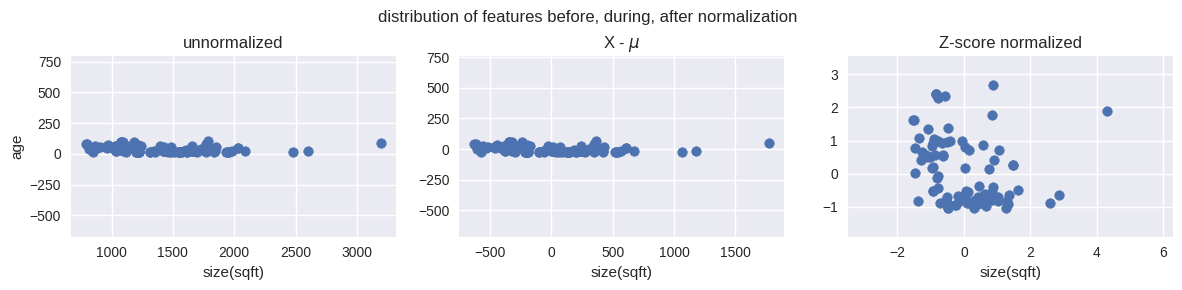

In [20]:
mu = np.mean(X_train,axis=0)   
sigma = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax = plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()


最右侧的图是执行完z-score标准化后的特征样本值分布, 可以看出两个特征值已经具有相似的尺度.

下面对所有的特征进行标准化处理:


In [21]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")


X_mu = [1.42e+03 2.72e+00 1.38e+00 3.84e+01], 
X_sigma = [411.62   0.65   0.49  25.78]
Peak to Peak range by column in Raw        X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 6.14 2.06 3.69]


处理前后的可视化对比:


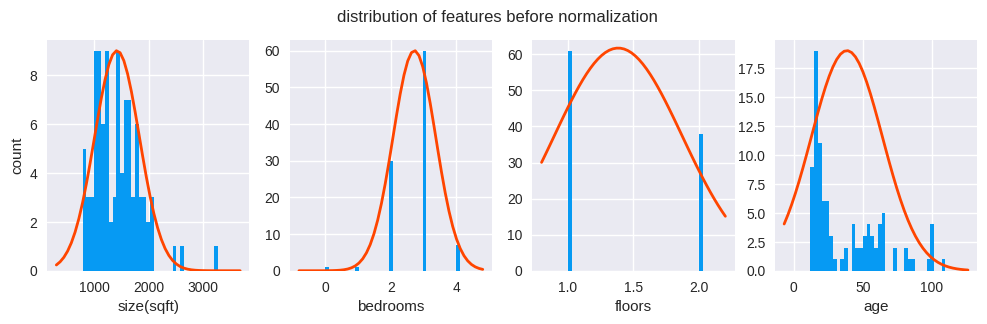

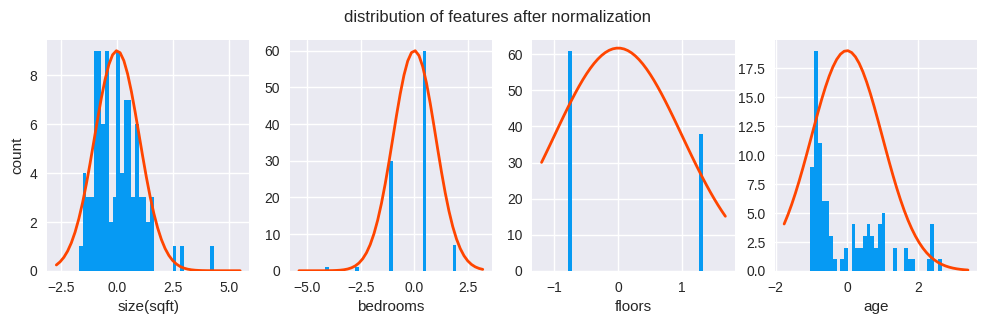

In [22]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribution of features after normalization")

plt.show()


注意观察横坐标, 可以看出各个特征的样本范围都缩小到了差不多的尺度. 放缩效果最明显的面积范围缩小了近千倍.

#### 等值线

另一种观察特征缩放的方式是通过代价等值线图。当特征尺度不匹配时，代价与参数在等值线图中的关系会呈现不对称性:


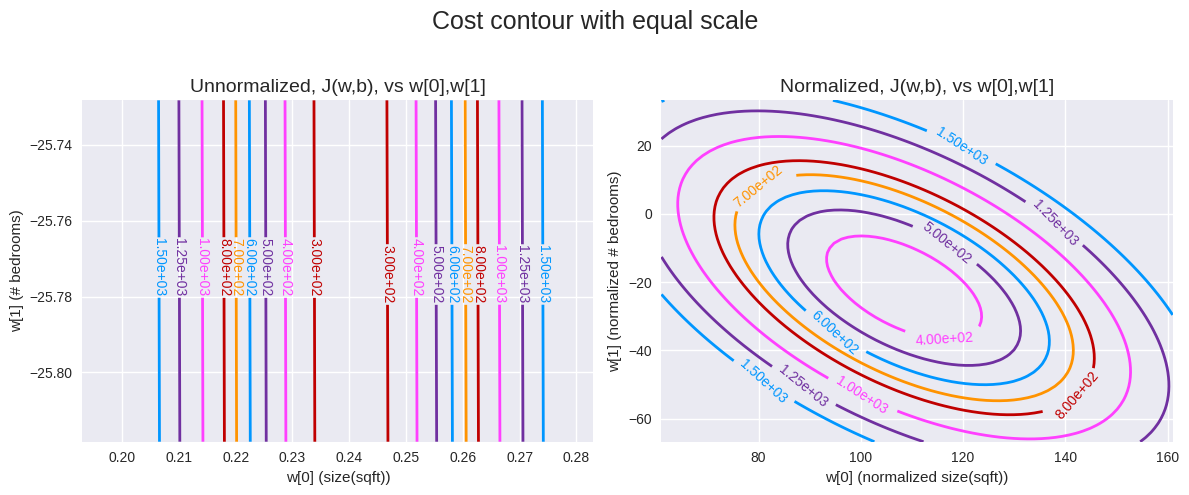

In [23]:
plt_equal_scale(X_train, X_norm, y_train)


## 特征工程

> 以下笔记由[Cursor](https://docs.cursor.com/zh/welcome)生成

<b>特征工程 (*Feature Engineering*)</b>是机器学习中通过领域知识和数据挖掘技术，从原始数据中提取、构造、选择和转换特征，以提升模型性能的关键过程。

### 为什么需要特征工程？

想象一下，你要教一个小孩识别猫：
- **原始数据**：一堆像素值（数字矩阵）
- **特征工程后**：耳朵形状、胡须长度、眼睛颜色等**有意义的特征**

特征工程就是帮算法"看懂"数据的过程！

### 特征工程的主要步骤

#### 1. 特征提取（Feature Extraction）
从原始数据中提取有用信息
- **文本**：词频、TF-IDF、词向量
- **图像**：边缘、纹理、颜色直方图
- **时间序列**：趋势、季节性、周期性

#### 2. 特征构造（Feature Construction）
创造新的特征
- **组合特征**：年龄×收入 = 购买力指数
- **多项式特征**：x², x³ 用于非线性关系
- **交互特征**：特征间的乘积或比值

#### 3. 特征选择（Feature Selection）
选择最重要的特征
- **过滤法**：相关性分析、卡方检验
- **包装法**：递归特征消除
- **嵌入法**：L1正则化、树模型重要性

#### 4. 特征变换（Feature Transformation）
改变特征的表示方式
- **特征缩放**：标准化、归一化
- **编码**：独热编码、标签编码
- **降维**：PCA、LDA


### 实际应用案例

**案例**：电商用户购买预测
```
原始数据：用户ID、浏览时间、点击次数、页面停留时间
特征工程后：
- 浏览深度 = 点击次数 / 页面停留时间
- 活跃时段 = 浏览时间的时段分布
- 兴趣标签 = 基于浏览内容的标签权重
- 购买倾向 = 历史行为的时间衰减加权
```

### 特征工程实践

让我们在房价预测数据集上演示特征工程：


In [24]:
# 特征工程示例：构造新特征
print("Original features shape:", X_train.shape)
print("Original features names:", X_features)

# 1. 特征构造：面积/房间数 = 每房间平均面积
X_engineered = X_train.copy()
X_engineered = np.column_stack([X_engineered, X_train[:, 0] / (X_train[:, 1] + 1)])  # 避免除零

# 2. 特征构造：楼层×房间数 = 总房间数
X_engineered = np.column_stack([X_engineered, X_train[:, 1] * X_train[:, 2]])

# 3. 特征构造：年龄的平方（非线性关系）
X_engineered = np.column_stack([X_engineered, X_train[:, 3] ** 2])

print("\nNew features shape:", X_engineered.shape)
print("New features names:", X_features + ['面积/房间数', '总房间数', '年龄²'])

# 显示前5个样本的对比
print("\nFirst 5 samples:")
print("Original features:")
print(X_train[:5])
print("\nEngineered features:")
print(X_engineered[:5])


Original features shape: (99, 4)
Original features names: ['size(sqft)', 'bedrooms', 'floors', 'age']

New features shape: (99, 7)
New features names: ['size(sqft)', 'bedrooms', 'floors', 'age', '面积/房间数', '总房间数', '年龄²']

First 5 samples:
Original features:
[[1.24e+03 3.00e+00 1.00e+00 6.40e+01]
 [1.95e+03 3.00e+00 2.00e+00 1.70e+01]
 [1.72e+03 3.00e+00 2.00e+00 4.20e+01]
 [1.96e+03 3.00e+00 2.00e+00 1.50e+01]
 [1.31e+03 2.00e+00 1.00e+00 1.40e+01]]

Engineered features:
[[1.24e+03 3.00e+00 1.00e+00 6.40e+01 3.11e+02 3.00e+00 4.10e+03]
 [1.95e+03 3.00e+00 2.00e+00 1.70e+01 4.87e+02 6.00e+00 2.89e+02]
 [1.72e+03 3.00e+00 2.00e+00 4.20e+01 4.31e+02 6.00e+00 1.76e+03]
 [1.96e+03 3.00e+00 2.00e+00 1.50e+01 4.90e+02 6.00e+00 2.25e+02]
 [1.31e+03 2.00e+00 1.00e+00 1.40e+01 4.38e+02 2.00e+00 1.96e+02]]


### 特征选择

特征选择是特征工程中的重要步骤，目的是从众多特征中选择出对模型最有用的特征。


In [25]:
# 特征选择示例：基于相关性的特征选择
from scipy.stats import pearsonr

# 计算每个特征与目标变量的相关性
feature_names = X_features + ['Area/Bedrooms', 'Total Rooms', 'Age²']
correlations = []

for i in range(X_engineered.shape[1]):
    corr, _ = pearsonr(X_engineered[:, i], y_train)
    correlations.append(abs(corr))  # 取绝对值

# 创建特征重要性排序
feature_importance = list(zip(feature_names, correlations))
feature_importance.sort(key=lambda x: x[1], reverse=True)

print("Feature importance based on correlation with price:")
for i, (feature, importance) in enumerate(feature_importance):
    print(f"{i+1}. {feature}: {importance:.3f}")

# 选择前5个最重要的特征
top_features = [f[0] for f in feature_importance[:5]]
top_indices = [feature_names.index(f) for f in top_features]

X_selected = X_engineered[:, top_indices]
print(f"\nSelected features: {top_features}")
print(f"Selected features shape: {X_selected.shape}")


Feature importance based on correlation with price:
1. size(sqft): 0.856
2. Area/Bedrooms: 0.608
3. age: 0.572
4. Age²: 0.511
5. Total Rooms: 0.402
6. floors: 0.315
7. bedrooms: 0.283

Selected features: ['size(sqft)', 'Area/Bedrooms', 'age', 'Age²', 'Total Rooms']
Selected features shape: (99, 5)


### 特征工程总结

特征工程是机器学习项目成功的关键因素之一。通过合理的设计和选择特征，我们可以：

1. **提升模型性能**：好的特征能让模型更好地学习数据中的模式
2. **减少计算复杂度**：通过特征选择降低维度，提高训练效率
3. **增强模型可解释性**：有意义的特征更容易理解和解释
4. **提高泛化能力**：避免过拟合，提升模型在新数据上的表现

### 特征工程最佳实践

- **领域知识驱动**：结合业务理解设计特征
- **数据质量优先**：确保特征数据的准确性和完整性
- **迭代优化**：通过实验不断改进特征设计
- **自动化工具**：利用Featuretools等工具提高效率

记住：**数据和特征决定了机器学习的上限，而模型和算法只是逼近这个上限**！
